In [264]:
import pandas as pd

In [265]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')
sub = pd.read_csv('./titanic/sample_submission.csv')

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

In [266]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [267]:
# 2-3 (추가) groupby 연습 - 댓글
train[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [268]:
# 2-3 (추가) sort_values 연습 - 댓글
train.groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


In [269]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [270]:
test.dtypes.values[0]

dtype('int64')

In [271]:
test.dtypes.index

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1-3 모델 만들고 제출해 보기
* 모듈을 import(불러오기)을 이용하여 sklearn(Scikit-Learn)
* 모델(로지스틱 회귀)을 생성 후, 학습(fit)
* 그리고 예측(predict)을 수행 후, 제출한다.

In [272]:
# 머신 러닝 모델 로드
from sklearn.linear_model import LogisticRegression

In [273]:
sel = ['Pclass', 'SibSp', 'Parch']

X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [274]:
model = LogisticRegression()

In [275]:
model.fit(X_train, y_train)

LogisticRegression()

In [276]:
pred = model.predict(X_test)
pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [277]:
sub.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [278]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [279]:
sub.shape, test.shape

((418, 2), (418, 11))

In [280]:
sub['Survived'] = pred
sub.to_csv('first_submit.csv', index=False)

### 하나 하나 열을 불러와서 5행씩 확인하기

In [281]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
sub = pd.read_csv("./titanic/sample_submission.csv")

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

In [282]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [284]:
for col1 in train.columns:
    print(col1)
    print(train[col1].head())
    print()

PassengerId
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

Survived
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Pclass
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Sex
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

SibSp
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

Parch
0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

Ticket
0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Fare
0     7.250

### 데이터 결측치 확인(시작적으로)

In [285]:
# pyplot : matplotlib안에 그래프 그리는 툴을 묶은 것.
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

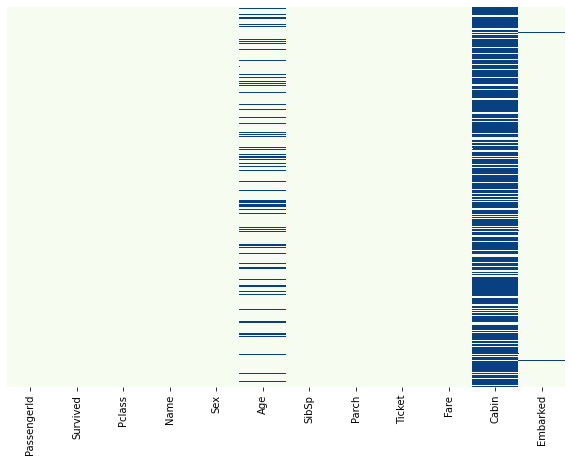

In [286]:
plt.figure(figsize=(10,7)) # cmpa : summer도 해보기
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="GnBu") 

In [287]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 범주형 변수, 수치형 변수

In [288]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### for문 리스트 내포

In [289]:
num_cols = []
for col in train.columns[:12]:
    if train[col].dtype in ['int64', 'float64']:
        num_cols.append(col)
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [290]:
num_cols = [col for col in train.columns[:12] if train[col].dtype in ['int64', 'float64']]
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [291]:
# 'O' : object
cat_cols = [col for col in train.columns[:12] if train[col].dtype in ['O']]
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### 나이에 대해 살펴보자

In [292]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [293]:
train.Survived.unique()

array([0, 1], dtype=int64)

C:\Users\kbjoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kbjoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


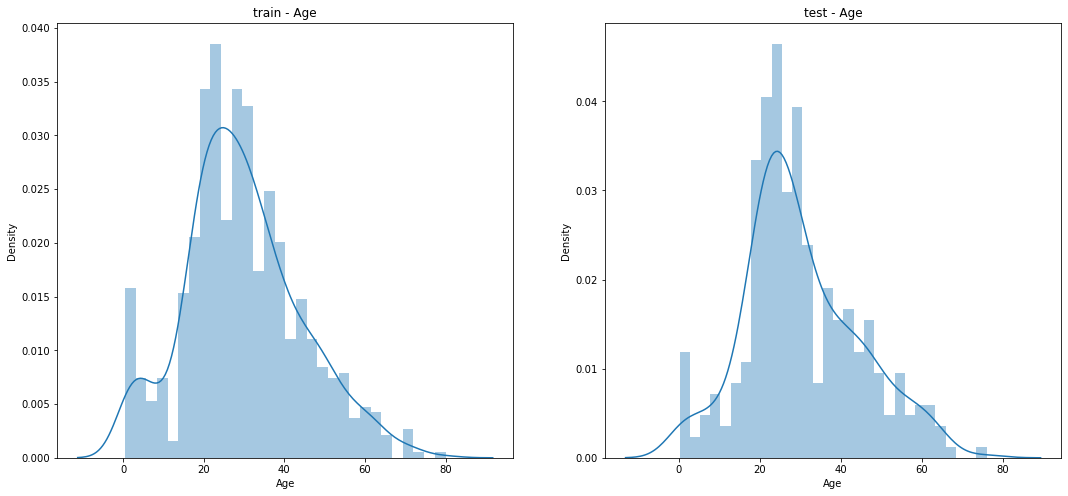

In [294]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30, ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30, ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

### 결측치 처리 - 나이, 요금

In [295]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 결측치 처리 - 나이, 요금
* 결측치 값을 채우기 - usage : data['열이름'].fillna(값)

##### train과 test의 Age 결측값은 중앙값으로 처리

In [296]:
# [].fillna(값) : 결측치를 '값'으로 채운다.
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [297]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

#### train Embarked 결측치 처리

In [298]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### 가장 많은 값으로 처리한다.

In [299]:
train['Embarked'] = train['Embarked'].fillna('S')

In [300]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

## 자료형 변환
* 데이터 자료형 변환
* 데이터.astype(변환될 자료형명)

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [302]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [303]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [304]:
train['Sex'] = train['Sex'].map({'female':0, 'male':1}).astype(int)
test['Sex'] = test['Sex'].map({'female':0, 'male':1}).astype(int)

In [305]:
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [306]:
train['Sex'].unique()

array([1, 0])

In [307]:
train['Embarked'].unique()

array([0, 1, 2])

### 컬럼과 컬럼 사이의 관계 확인(상관계수 Heatmap)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

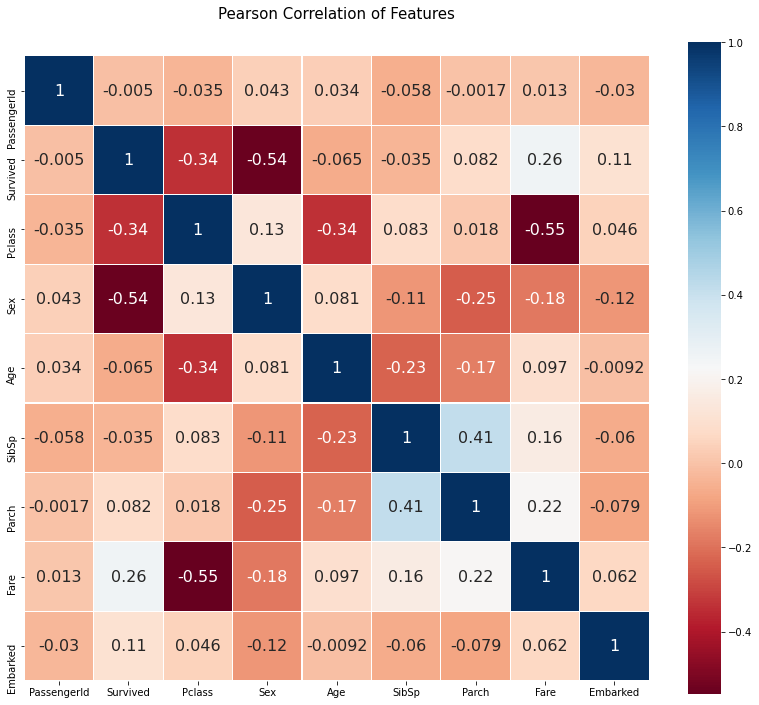

In [308]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

#### 모델 만들고 제출해보기

In [309]:
# 'Name', 'Ticket' =>  문자포함
sel = ['Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [310]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_train, y_train)

LogisticRegression()

In [311]:
# 예측
pred = log_r.predict(X_test)
pred[:15]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [312]:
sub = pd.read_csv("./titanic/sample_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [313]:
sub['Survived'] = pred
sub.to_csv('second_submit.csv', index=False)

#### 4-4 (추가) Cabin이 비어있는 행에 Cabin_bool 변수를 만들고, 이를 모델에 추가해 보자.

In [314]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [315]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [316]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
D              3
              ..
E40            1
A14            1
C45            1
C106           1
B101           1
Name: Cabin, Length: 147, dtype: int64

In [317]:
train.loc[train['Cabin'].notnull(), 'Cabin'] = 'exist'
test.loc[test['Cabin'].notnull(), 'Cabin'] = 'exist'

In [318]:
# 'Cabin'중 없는 값은 0으로 있으면 1로 설정
train['Cabin'] = train['Cabin'].fillna('empty')
test['Cabin'] = test['Cabin'].fillna('empty')

In [319]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [320]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 32.8+ KB


In [321]:
train['Cabin']

0      empty
1      exist
2      empty
3      exist
4      empty
       ...  
886    empty
887    exist
888    empty
889    exist
890    empty
Name: Cabin, Length: 891, dtype: object

In [322]:
train['Cabin'] = train['Cabin'].map({'empty':0,'exist':1}).astype(int)
test['Cabin'] = test['Cabin'].map({'empty':0,'exist':1}).astype(int)

In [323]:
train['Cabin'].unique()

array([0, 1])

In [324]:
test['Cabin'].unique()

array([0, 1])

### 컬럼과 컬럼 사이의 관계 확인(상관계수 Heatmap)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

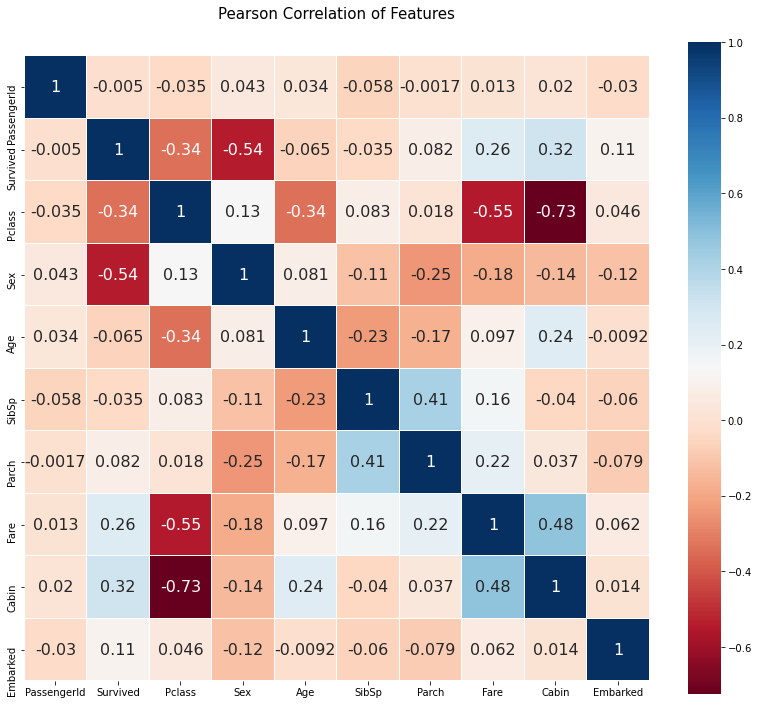

In [325]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

### 모델만들고 제출

In [326]:
# 'Name', 'Ticket' =>  문자포함
sel = ['Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked', 'Cabin' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [327]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_train, y_train)

LogisticRegression()

In [328]:
# 예측
pred = log_r.predict(X_test)
pred[:15]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [329]:
sub = pd.read_csv("./titanic/sample_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [330]:
sub['Survived'] = pred
sub.to_csv('third_submit.csv', index=False)

### 5-4 (추가) Name을 기준으로 Name의 길이를 변수를 만들어서 넣어보기

In [ ]:
# Name의 원소 하나 불러와 길이 제기
# 길이를 Name열에 집어넣기
# 상관관계 알아보기